Task 03: Customer Prediction Dataset (Bank Customers).

Objective: Identify customers who are likely to leave the bank.

Dataset: Churn Modleing Dataset.
About Dataset:
Content:
This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

Load the Dataset:

In [1]:
import pandas as pd

In [2]:
Dataset = pd.read_csv("Churn_Modelling.csv")

Data Exploration:

In [3]:
Dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


As we see in the data, fields like RowNumber, CustomerId and Surname do not matter at all during out analysis. They are just additional infomration about the bank customers. So, we go ahead and drop these three columns.

In [4]:
Dataset.drop(["RowNumber","CustomerId","Surname"], axis = 1, inplace = True)

In [5]:
Dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
Dataset.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
Dataset.shape

(10000, 11)

In [8]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
Dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
Dataset.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [11]:
Dataset.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Data Visualization:

In [12]:
import numpy as np

import pandas as pd 

import matplotlib as pyplot
from matplotlib import pyplot as plt

import seaborn as sns 

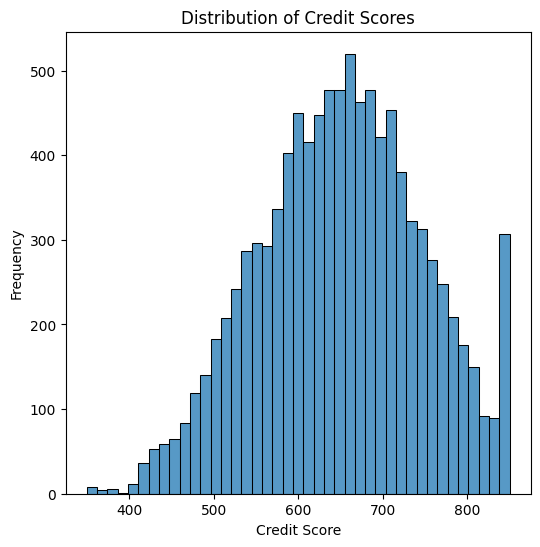

In [13]:
plt.figure(figsize=(6,6))

sns.histplot(Dataset["CreditScore"])

plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.title("Distribution of Credit Scores")

plt.show()

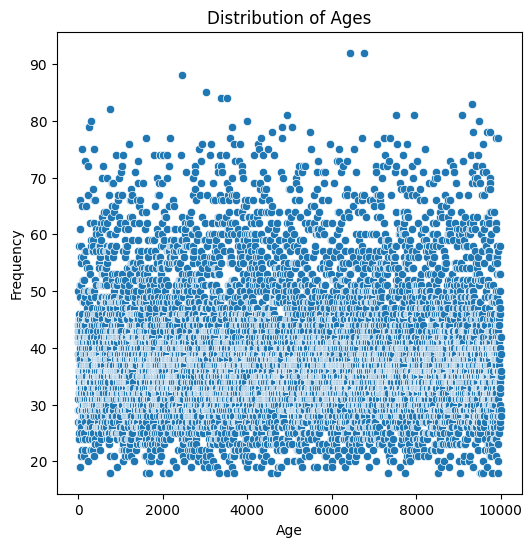

In [14]:
plt.figure(figsize=(6,6))

sns.scatterplot(Dataset["Age"])

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Ages")

plt.show()

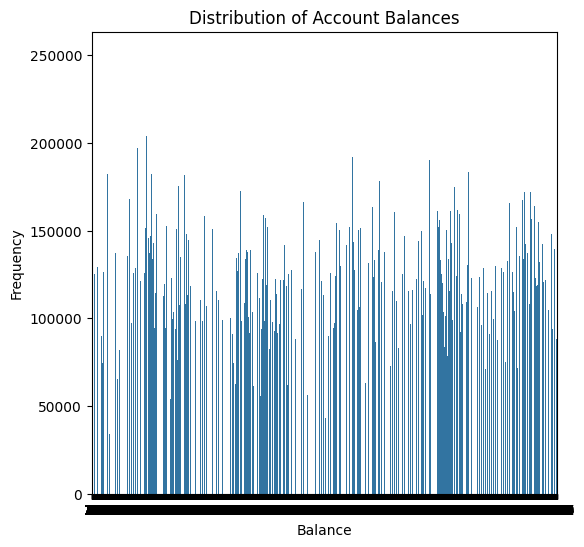

In [15]:
plt.figure(figsize=(6,6))

sns.barplot(Dataset["Balance"])

plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.title("Distribution of Account Balances")

plt.show()

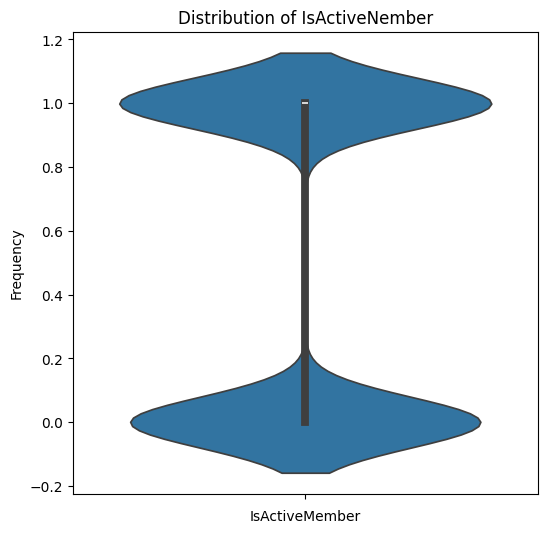

In [16]:
plt.figure(figsize=(6,6))

sns.violinplot(Dataset["IsActiveMember"])

plt.xlabel("IsActiveMember")
plt.ylabel("Frequency")
plt.title("Distribution of IsActiveNember")

plt.show()

Text(0.5, 0.98, 'Relationship between all the variables')

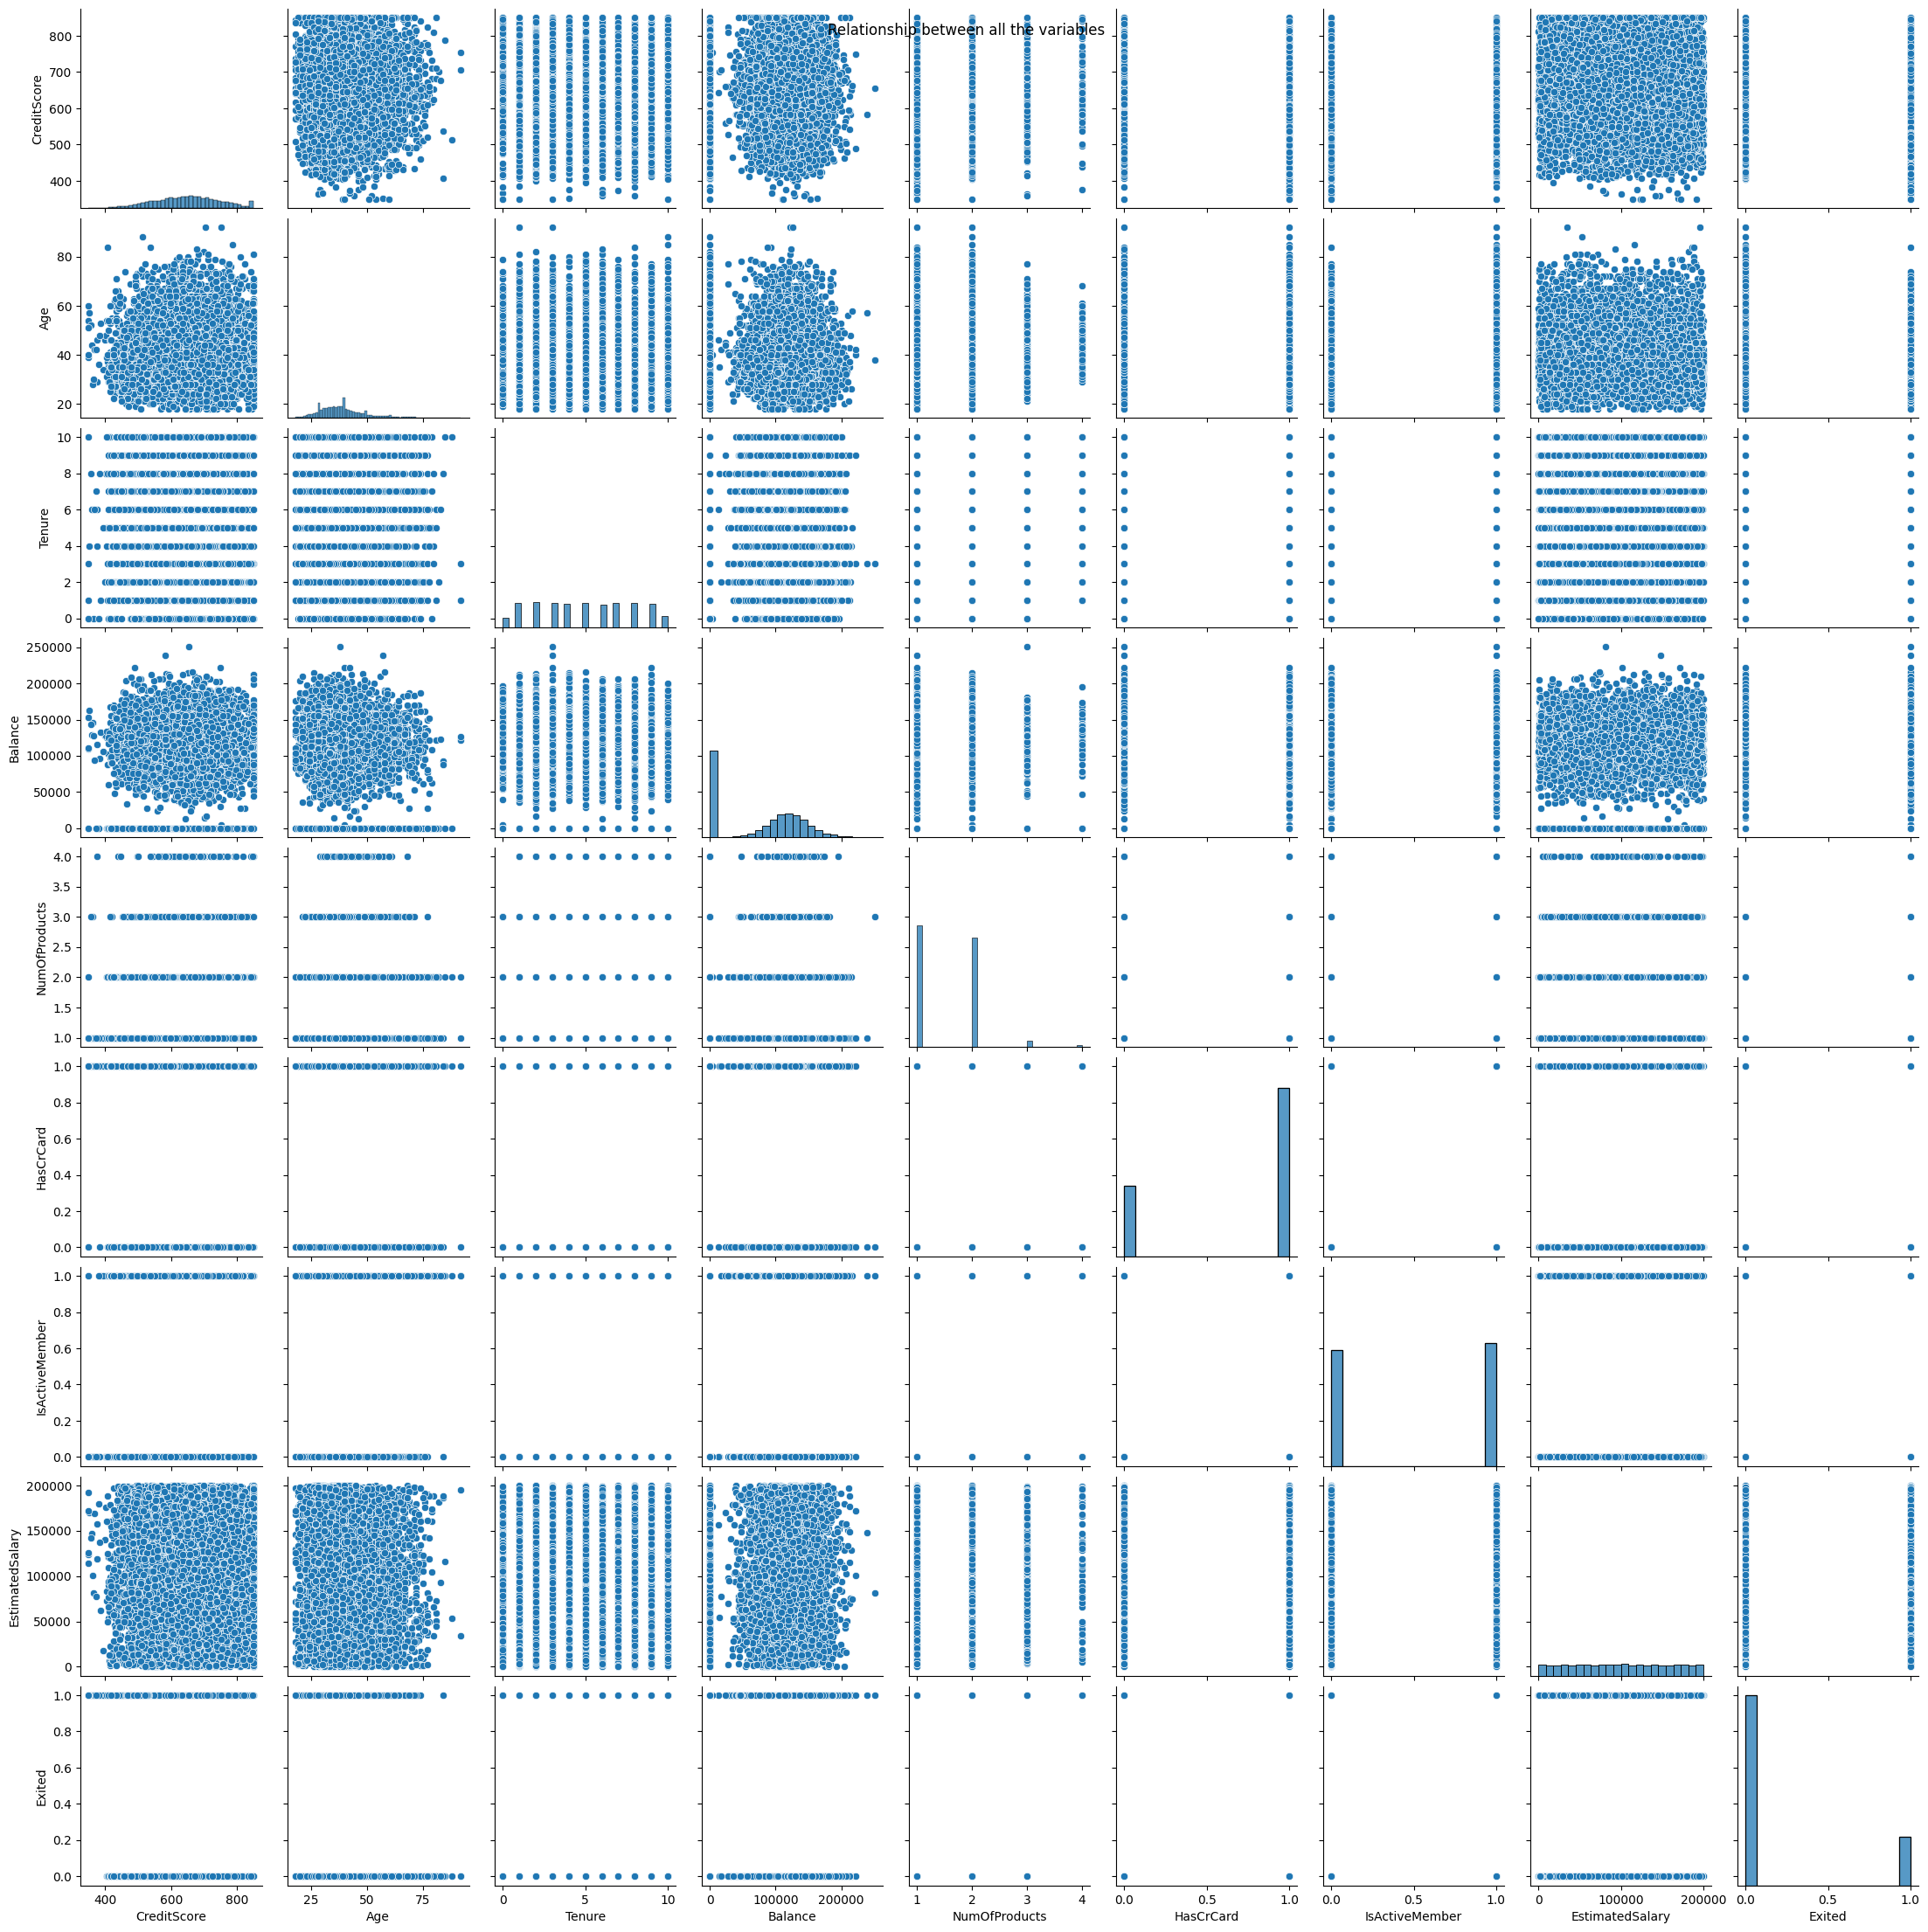

In [17]:
plt.Figure(figsize=(6,6))

sns.pairplot(Dataset)

plt.suptitle("Relationship between all the variables")

Clean and prepare the Dataset.

In [18]:
# Import Libraries.

import pandas as pd
import numpy as np

import matplotlib as pyplot
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
print(Dataset.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [20]:
dataset = Dataset.dropna()

In [21]:
dataset = pd.get_dummies(Dataset, drop_first=True)

In [22]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


Encode the categorical features such as geography and Gender.

One Hot Encoding.

In [23]:
dataset[["Geography_Germany","Geography_Spain","Gender_Male"]].head()

,Geography_Germany,Geography_Spain,Gender_Male
0,False,False,False
1,False,True,False
2,False,False,False
3,False,False,False
4,False,True,False


In [24]:
# One-hot Encoding For the Geography and Gender.
dataset = pd.get_dummies(dataset, columns=["Geography_Germany","Geography_Spain", "Gender_Male"], drop_first=True)

In [25]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany_True,Geography_Spain_True,Gender_Male_True
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


Label Encoding.

In [26]:
# Initialize Label Encoder.
le = LabelEncoder()

# Encode Geography_Spain_True.
dataset["Geography_Spain_True"] = le.fit_transform(dataset["Geography_Spain_True"])

# Encode Geography_Germany.
dataset["Geography_Germany_True"] = le.fit_transform(dataset["Geography_Germany_True"])

# Encode Gender_Male_True.
dataset["Gender_Male_True"] = le.fit_transform(dataset["Gender_Male_True"])

In [27]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany_True,Geography_Spain_True,Gender_Male_True
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Train a clasiification Model.

Logistic Regression.

In [28]:
x = dataset.drop("Exited", axis=1)
y = dataset["Exited"]

In [29]:
x = pd.get_dummies(x, drop_first=True)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
print("Training Data:", x_train.shape)
print("Testing Data:", x_test.shape)

Training Data: (8000, 11)
Testing Data: (2000, 11)


In [32]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train, y_train)

y_predict_logistic = logistic_model.predict(x_test)

c:\Users\zaigh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evalute the Model using the Confuson Matrix and the Accuracy.

In [33]:
print("Logistic Regression Accuracy: \n",
      accuracy_score(y_test, y_predict_logistic))

print("Confusion Matrix: \n",
      confusion_matrix(y_test, y_predict_logistic))

Logistic Regression Accuracy: 
 0.8145
Confusion Matrix: 
 [[1547   60]
 [ 311   82]]


In [34]:
cm = confusion_matrix(y_test, y_predict_logistic)
TN, FP, FN, TP = cm.ravel()

# Create a Structured Table.
metrics_table = pd.DataFrame({
    'Metric': ['TP', 'TN', 'FP', 'FN', 'Accuracy', 'Precision', 'Recall'],
    'Value': [TP, TN, FP, FN,
              (TP+TN)/(TP+TN+FP+FN),
              TP/(TP+FP),
              TP/(TP+FN)]})

print(metrics_table)

      Metric        Value
0         TP    82.000000
1         TN  1547.000000
2         FP    60.000000
3         FN   311.000000
4   Accuracy     0.814500
5  Precision     0.577465
6     Recall     0.208651


Decision Tree.

In [35]:
decisionTree_model = DecisionTreeClassifier(random_state=42)

decisionTree_model.fit(x_train, y_train)

y_predict_decisionTree = decisionTree_model.predict(x_test)

Evalute the Model using the Confuson Matrix and the Accuracy.

In [36]:
print("Decision Tree Accuracy: \n",
      accuracy_score(y_test, y_predict_decisionTree))

print("Confusion Matrix: \n",
      confusion_matrix(y_test, y_predict_decisionTree))

Decision Tree Accuracy: 
 0.7805
Confusion Matrix: 
 [[1362  245]
 [ 194  199]]


In [37]:
cm = confusion_matrix(y_test, y_predict_decisionTree)
TN, FP, FN, TP = cm.ravel()

# Create a Structured Table.
metrics_table = pd.DataFrame({
    'Metric': ['TP', 'TN', 'FP', 'FN', 'Accuracy', 'Precision', 'Recall'],
    'Value': [TP, TN, FP, FN,
              (TP+TN)/(TP+TN+FP+FN),
              TP/(TP+FP),
              TP/(TP+FN)]})
print(metrics_table)

      Metric        Value
0         TP   199.000000
1         TN  1362.000000
2         FP   245.000000
3         FN   194.000000
4   Accuracy     0.780500
5  Precision     0.448198
6     Recall     0.506361


Analyze feature importance to understand what influences churn.

Skills:
Categorical data encoding (Label Encoding/One-Hot Encoding).
Supervised classifcation modeling.
Understanding and interpeting feature importance.

Task completed.
Best Wishes.
Zaigham Abbas.